Credit card fraud detection using Machine learning

In [1]:
#importing libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from imblearn.over_sampling import ADASYN
from collections import Counter
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics


%matplotlib inline
sns.set_style("darkgrid")
sns.set_palette("colorblind")

Using TensorFlow backend.


In [2]:
#dataset
df = pd.read_csv("Desktop/creditcard.csv")

In [3]:
#To get the  first n rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#printing a concise summary of a DataFram
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
#printing the no.of normal transactions count and Fraudulent transactions count
print('Normal transactions count: ',df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ',df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


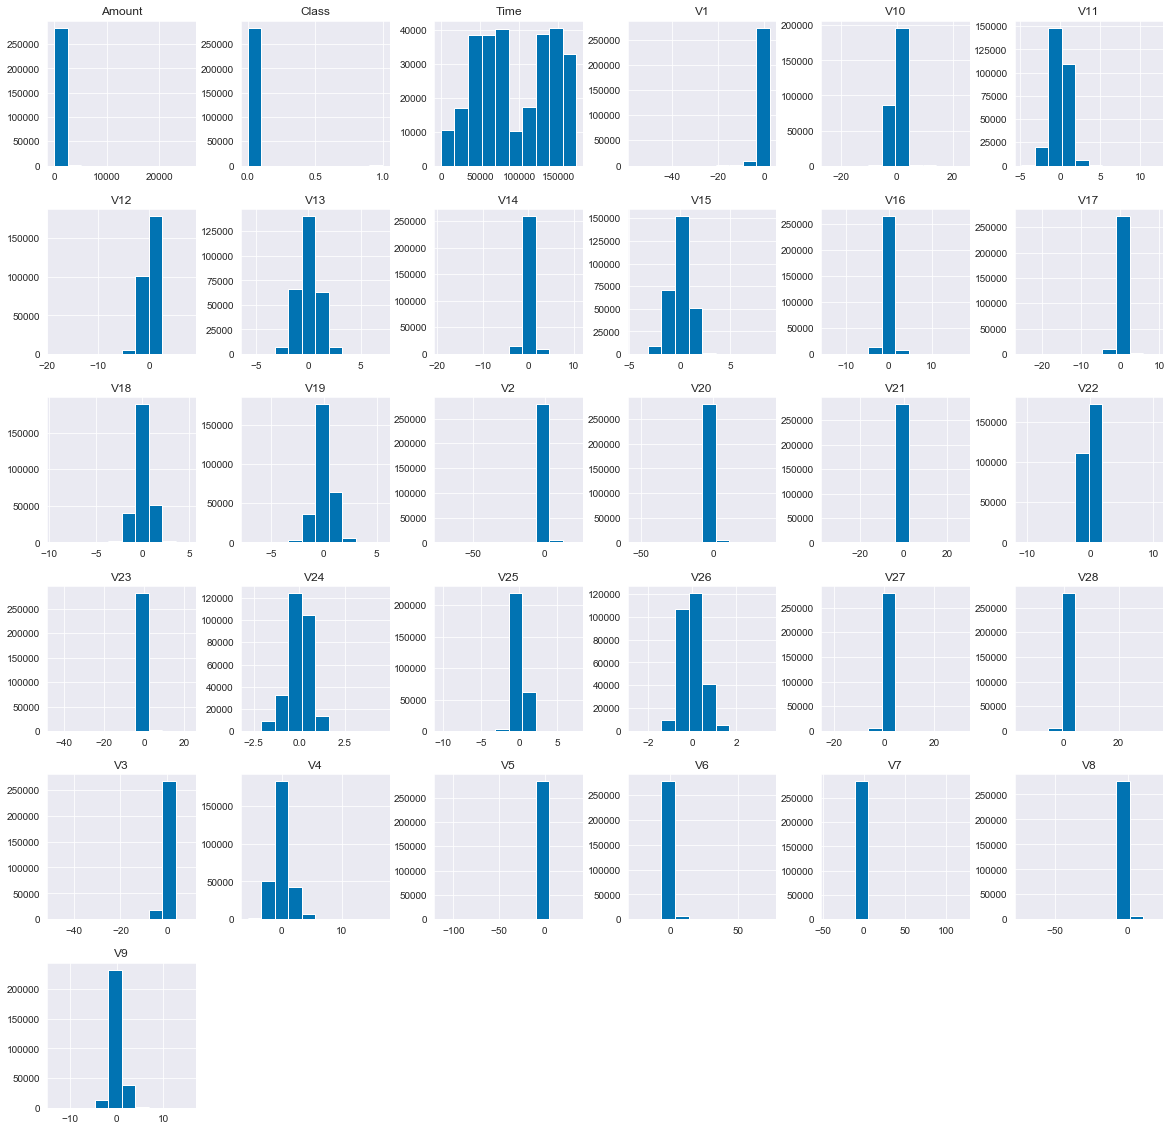

In [7]:
# Plot histograms of each parameter 
df.hist(figsize = (20, 20))
plt.show()


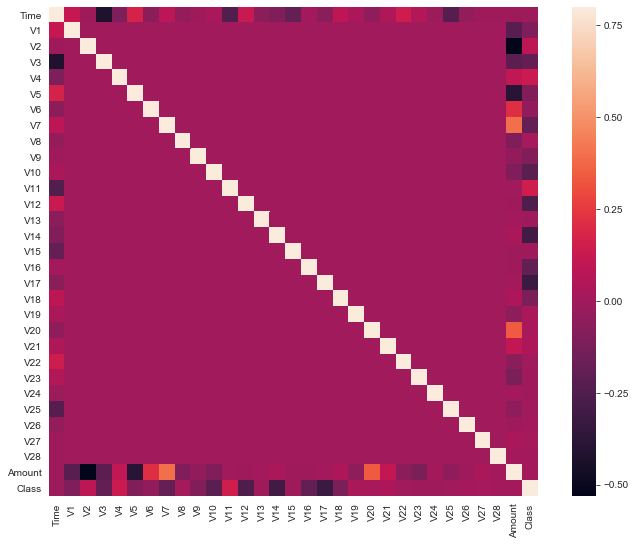

In [12]:
# Correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [6]:
# feature data (predictors)
X = df.iloc[:, :-1]
# label class
Y = df['Class']

In [7]:
# standardize data
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [9]:
#data is partitioned into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_X, Y, test_size=0.33, random_state=42)

In [10]:
#apply the ADASYN over-sampling
ada = ADASYN(random_state=42)
print('Shape of original dataset{}'.format(Counter(y_train)))
X_res, y_res = ada.fit_sample(X_train, y_train)
print('Shape of resampled dataset{}'.format(Counter(y_res)))

Shape of original datasetCounter({0: 190477, 1: 343})
Shape of resampled datasetCounter({0: 190477, 1: 190471})


TRAIN MODELS

RandomForest was trained using the processed feature data.

In [11]:
#Train Decision tree Model
RDF_Classifier = RandomForestClassifier(random_state=0)
RDF_Classifier.fit(X_train, y_train);


In [13]:
#Evaluate models
modlist = [('RandomForest Classifier', RDF_Classifier)]
models = [j for j in modlist]
print()
print('============================== Model Evaluation Results==================================='"\n")
for i, v in models:
    scores = cross_val_score(v, X_train, y_train, cv=10)
    accuracy = metrics.accuracy_score(y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(y_train, v.predict(X_train))
    classification = metrics.classification_report(y_train, v.predict(X_train))
    print('===={}===='.format(i))
    print ("Cross Validation Mean Score: ", '{}%'.format(np.round(scores.mean(), 3) * 100))  
    print() 
    print ("Model Accuracy: ", '{}%'.format(np.round(accuracy, 3) * 100)) 
    print()
    print("Confusion Matrix:" "\n", confusion_matrix)
    print()
    print()



============================== Model Evaluation Results===================================

====RandomForest Classifier====
Cross Validation Mean Score:  99.9%

Model Accuracy:  100.0%

Confusion Matrix:
 [[190477      0]
 [     0    343]]


